# Decision Tree

 A árvore de decisão é um modelo de aprendizado de máquina, que utiliza os conceitos de árvores, normalmente o conceito de árvore binária, como no exemplo abaixo.

<center>

![image.png](../figures/decison_tree_ex.png)

</center>

 Além de que ela será do tipo de aprendizado supervisionado, onde iremos passar suas entradas, e principalmente, as suas saídas, para que assim o nosso modelo possa associar cada característica a cada rótulo.

## Scikit-learn

Aqui iremos utilizar como base, o scikit-learn (Machine Learning in Python), uma biblioteca em Python que faz uso de ferramentas e técnicas para o aprendizado de máquina. Basicamente ela usa uma versão otimizada do algoritmo CART (Classification and Regression Trees). Classificação e regressão são de uma forma resumida, os tipos de saídas que seram retornadas.

**Árvores de decisão para classificação:** 
- A saída irá retornar um valor específico ou uma classe, como por exemplo: (Cachorro, 1, Não Spam, Doente).

**Árvores de decisão para regressão:** 
- A saída irá retornar um valor contínuo, como por exemplo: (2.34, 10, 1.9999).

## Importando o Pandas e lendo o dataset tratado, transformando-o em um DataFrame

In [16]:
import pandas as pd

df = pd.read_csv('dataset_tratado.csv')


## Armazenando nas variáveis nossas colunas referentes a características e rótulos do nosso DataFrame

In [17]:
X = df.iloc[:, :-1]  # Armazenando todas as colunas de características, exceto a última pois ela é a coluna de rótulo
y = df.iloc[:, -1]   # Armazenado a última coluna, que será o nosso rótulo


## Dividindo os dados em um conjunto de treino, e outro conjunto para teste

Aqui neste momento, utilizamos cerca de 20% dos dados do nosso Dataset apenas para teste, enquanto o restante dos dados serão usados apenas para treinar o modelo.

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% dos dados serão usados para teste, e o restante para treino


## Criando um modelo e treinando-o

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

O nosso modelo será do tipo de classificação, pois diferente do modelo de regressão, aqui nos buscamos um retorno basicamente sendo "sim" ou "não", 1 para positivo e 0 para negativo, referente a situação do paciente em ter uma futura insuficiência cardíaca crónica.

## Aplicando as métricas no modelo

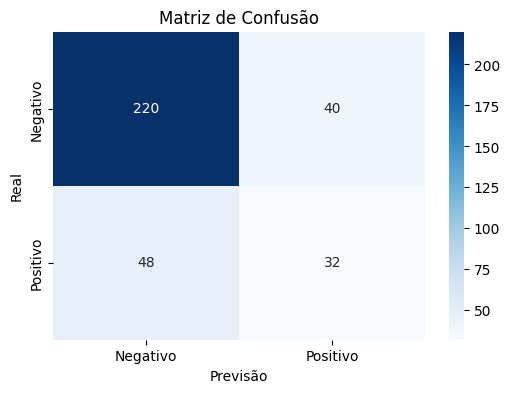

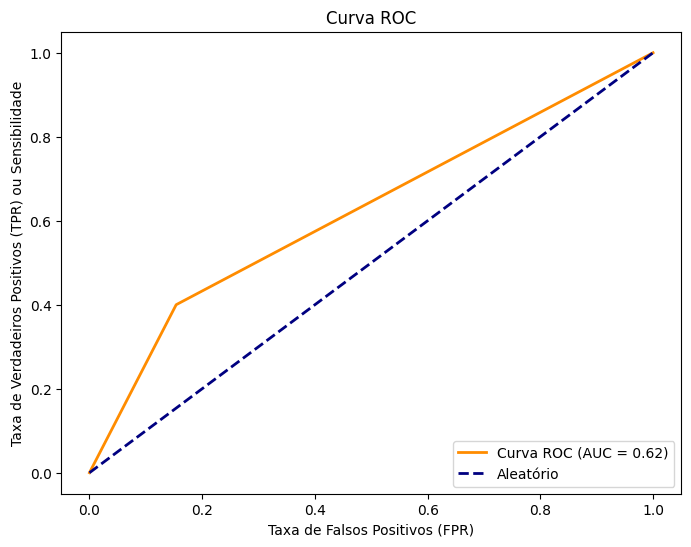

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       260
           1       0.44      0.40      0.42        80

    accuracy                           0.74       340
   macro avg       0.63      0.62      0.63       340
weighted avg       0.73      0.74      0.74       340



In [20]:
from sklearn.metrics import classification_report

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)
predictions = model.predict(X_test)

# Calcular e plotar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Curva ROC
probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR) ou Sensibilidade')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Calcular e imprimir as métricas
print(classification_report(y_test, y_pred, zero_division=0))
